In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from utils import (
    ESP32CSIMultiTaskModel,
    train_esp32_multitask_model,
    plot_training_results,
    visualize_predictions,
    preprocess_esp32_csi,
)

In [8]:
filename = "test_data.csv"

In [9]:
df = pd.read_csv(filename)
print("DataFrame head:")
print(df.head())

DataFrame head:
                                            CSI_DATA  state  locationX  \
0  [28 -64 1 0 0 0 0 0 0 0 0 0 12 0 12 1 13 1 13 ...      0         -1   
1  [28 -64 1 0 0 0 0 0 0 0 0 0 -17 17 -19 16 -20 ...      0         -1   
2  [-99 -48 9 0 0 0 0 0 0 0 0 0 -2 23 -4 24 -4 25...      0         -1   
3  [-121 112 8 0 0 0 0 0 0 0 0 0 18 -39 20 -40 21...      0         -1   
4  [-122 -31 23 0 0 0 0 0 0 0 0 0 -1 17 -2 18 -2 ...      0         -1   

   locationY  
0         -1  
1         -1  
2         -1  
3         -1  
4         -1  


In [10]:
# train model
model, history = train_esp32_multitask_model(
    csv_file=filename,
    input_shape=(128, 50),  # 128 subcarriers, 50 samples per window
    epochs=10,
    batch_size=8
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - location_location_mae: nan - location_loss: nan - loss: nan - presence_accuracy: 0.7846 - presence_loss: 0.2659 - val_location_location_mae: nan - val_location_loss: nan - val_loss: nan - val_presence_accuracy: 1.0000 - val_presence_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - location_location_mae: nan - location_loss: nan - loss: nan - presence_accuracy: 1.0000 - presence_loss: 0.0000e+00 - val_location_location_mae: nan - val_location_loss: nan - val_loss: nan - val_presence_accuracy: 1.0000 - val_presence_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - location_location_mae: nan - location_loss: nan - loss: nan - presence_accuracy: 1.0000 - presence_loss: 0.0000e+00 - val_location_location_mae: nan - val_location_loss: nan - val_loss: nan - val_presence_accuracy: 1.0000 - val_presence_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/10
7/7 ━━

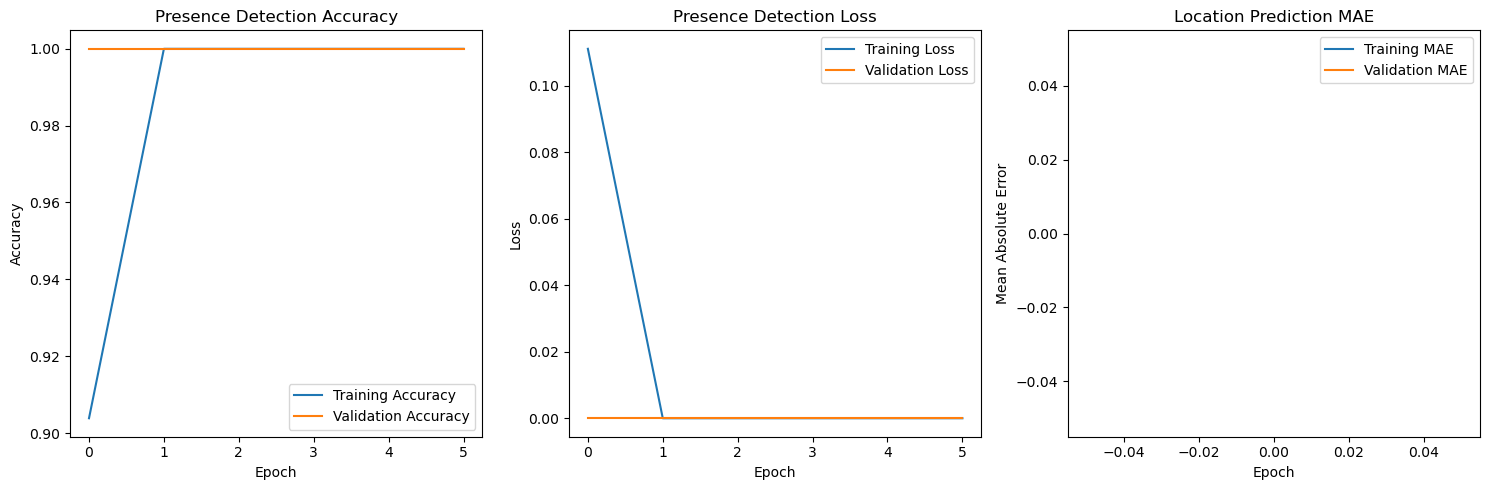

In [11]:
# visualize data
plot_training_results(history)

In [7]:
# SAVE WEIGHTS
model.model.save('esp32_csi_multitask_model.h5')